Enter the current price of the underlying asset (S): 100
Enter the lower strike price of the option (K1 for call, K2 for put): 80
Enter the upper strike price of the option (K2 for call, K1 for put): 120
Enter the time to maturity in years (T): 0.5
Enter the annual risk-free interest rate (r): 0.02
Enter the volatility (sigma): .4
Enter the type of spread ('call' or 'put'): put


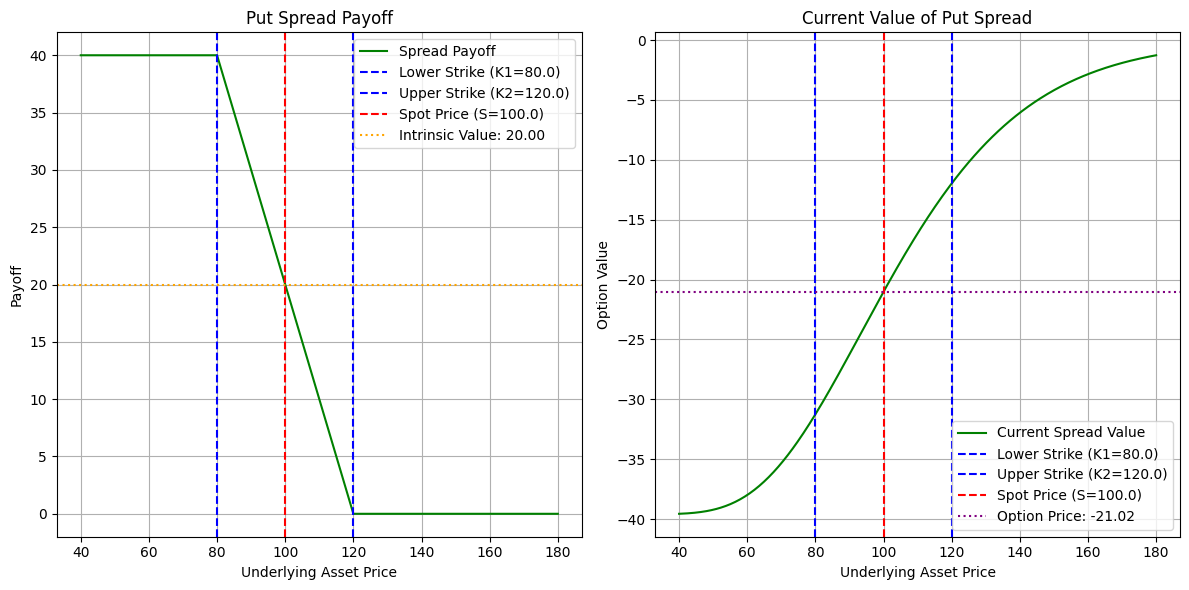

Current spread option price: -21.02
Intrinsic value at S: 20.00
Time value at S: -41.02


In [1]:
################################
###   SPREAD OPTION PRICER   ###
################################

import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

def vanilla_option_price(S, K, T, r, sigma, option_type="call"):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    if option_type == "call":
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

def spread_price(S, K1, K2, T, r, sigma, spread_type="call"):
    price_long = vanilla_option_price(S, K1, T, r, sigma, spread_type)
    price_short = vanilla_option_price(S, K2, T, r, sigma, spread_type)
    return price_long - price_short

def plot_spread_option_payoff_and_value(S, K1, K2, T, r, sigma, spread_type):
    prices = np.linspace(min(K1, K2) * 0.5, max(K1, K2) * 1.5, 400)
    if spread_type == "call":
        payoffs = np.maximum(prices - K1, 0) - np.maximum(prices - K2, 0)
        intrinsic_value_at_S = max(S - K1, 0) - max(S - K2, 0)
    else: # put spread
        payoffs = np.maximum(K2 - prices, 0) - np.maximum(K1 - prices, 0)
        intrinsic_value_at_S = max(K2 - S, 0) - max(K1 - S, 0)

    current_value_at_S = spread_price(S, K1, K2, T, r, sigma, spread_type)
    time_value_at_S = current_value_at_S - intrinsic_value_at_S

    plt.figure(figsize=(12, 6))

    # Payoff Graph
    plt.subplot(1, 2, 1)
    plt.plot(prices, payoffs, 'g-', label=f"Spread Payoff")
    plt.axvline(x=K1, color='blue', linestyle='--', label=f'Lower Strike (K1={K1})')
    plt.axvline(x=K2, color='blue', linestyle='--', label=f'Upper Strike (K2={K2})')
    plt.axvline(x=S, color='red', linestyle='--', label=f'Spot Price (S={S})')
    plt.axhline(y=intrinsic_value_at_S, color='orange', linestyle=':', label=f'Intrinsic Value: {intrinsic_value_at_S:.2f}')
    plt.title(f"{spread_type.capitalize()} Spread Payoff")
    plt.xlabel("Underlying Asset Price")
    plt.ylabel("Payoff")
    plt.legend()
    plt.grid(True)

    # Current Value Graph
    plt.subplot(1, 2, 2)
    plt.plot(prices, [spread_price(S_i, K1, K2, T, r, sigma, spread_type) for S_i in prices], 'g-', label=f"Current Spread Value")
    plt.axvline(x=K1, color='blue', linestyle='--', label=f'Lower Strike (K1={K1})')
    plt.axvline(x=K2, color='blue', linestyle='--', label=f'Upper Strike (K2={K2})')
    plt.axvline(x=S, color='red', linestyle='--', label=f'Spot Price (S={S})')
    plt.axhline(y=current_value_at_S, color='purple', linestyle=':',  label=f'Option Price: {current_value_at_S:.2f}')
    plt.title(f"Current Value of {spread_type.capitalize()} Spread")
    plt.xlabel("Underlying Asset Price")
    plt.ylabel("Option Value")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Output with two decimals
    print(f"Current spread option price: {current_value_at_S:.2f}")
    print(f"Intrinsic value at S: {intrinsic_value_at_S:.2f}")
    print(f"Time value at S: {time_value_at_S:.2f}")

# User inputs
S = float(input("Enter the current price of the underlying asset (S): "))
K1 = float(input("Enter the lower strike price of the option (K1 for call, K2 for put): "))
K2 = float(input("Enter the upper strike price of the option (K2 for call, K1 for put): "))
T = float(input("Enter the time to maturity in years (T): "))
r = float(input("Enter the annual risk-free interest rate (r): "))
sigma = float(input("Enter the volatility (sigma): "))
spread_type = input("Enter the type of spread ('call' or 'put'): ").lower()

# Plot the payoff and current value
plot_spread_option_payoff_and_value(S, K1, K2, T, r, sigma, spread_type)
